In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [20]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df= pd.read_csv('/content/drive/MyDrive/teen_phone_addiction_dataset.csv')
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [4]:
N = 4
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Social_Media'

In [21]:
my_data = df['Time_on_Social_Media'].dropna()

mean = my_data.mean()
variance = my_data.var()
mode = my_data.mode().iloc[0] if not my_data.mode().empty else None
median = my_data.median()
quantile_25 = my_data.quantile(0.25)
quantile_50 = my_data.quantile(0.5)
quantile_75 = my_data.quantile(0.75)
skewness = my_data.skew()
kurtosis = my_data.kurtosis()
iqr = stats.iqr(my_data)

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Mode: {mode}")
print(f"Median: {median}")
print(f"Quantile 0.25: {quantile_25}")
print(f"Quantile 0.5: {quantile_50}")
print(f"Quantile 0.75: {quantile_75}")
print(f"Эксцесс: {skewness}")
print(f"Ассиметрия: {kurtosis}")
print(f"Интерквартильный размах: {iqr}")

Mean: 2.4992333333333336
Variance: 0.9765415927531409
Mode: 2.7
Median: 2.5
Quantile 0.25: 1.8
Quantile 0.5: 2.5
Quantile 0.75: 3.2
Эксцесс: 0.06697299104625637
Ассиметрия: -0.21322979611749826
Интерквартильный размах: 1.4000000000000001


### Числовые характеристики времени, проведенного в социальных сетях

В этом разделе рассчитываются и отображаются ключевые числовые характеристики переменной 'Time_on_Social_Media' после удаления пропущенных значений. Эти статистики дают представление о центральной тенденции, разбросе и форме распределения данных.

*   **Среднее:** Среднее время, проведенное в социальных сетях.
*   **Дисперсия:** Мера разброса данных вокруг среднего значения.
*   **Мода:** Наиболее часто встречающееся значение в наборе данных.
*   **Медиана:** Среднее значение, когда данные упорядочены.
*   **Квантили (0.25, 0.50, 0.75):** Представляют 25-й, 50-й (который является медианой) и 75-й процентили, указывая значения, ниже которых попадает определенный процент данных.
*   **Асимметрия (Skewness):** Измеряет асимметрию распределения. Положительное значение указывает на правостороннюю асимметрию (хвост справа), а отрицательное значение указывает на левостороннюю асимметрию (хвост слева).
*   **Эксцесс (Kurtosis):** Измеряет "хвостатость" распределения. Более высокий эксцесс указывает на более экстремальные значения (выбросы) по сравнению с нормальным распределением.
*   **Интерквартильный размах (IQR):** Разница между 75-м и 25-м процентилями, представляющая диапазон средних 50% данных.

**Промежуточный вывод:**

На основе рассчитанных числовых характеристик данные для 'Time_on_Social_Media' имеют среднее значение и медиану, которые относительно близки, что предполагает некоторую симметрию распределения. Значения асимметрии и эксцесса близки к нулю, что также указывает на распределение, которое, возможно, не имеет сильной асимметрии или экстремальных выбросов. Дисперсия и IQR дают представление о разбросе данных.

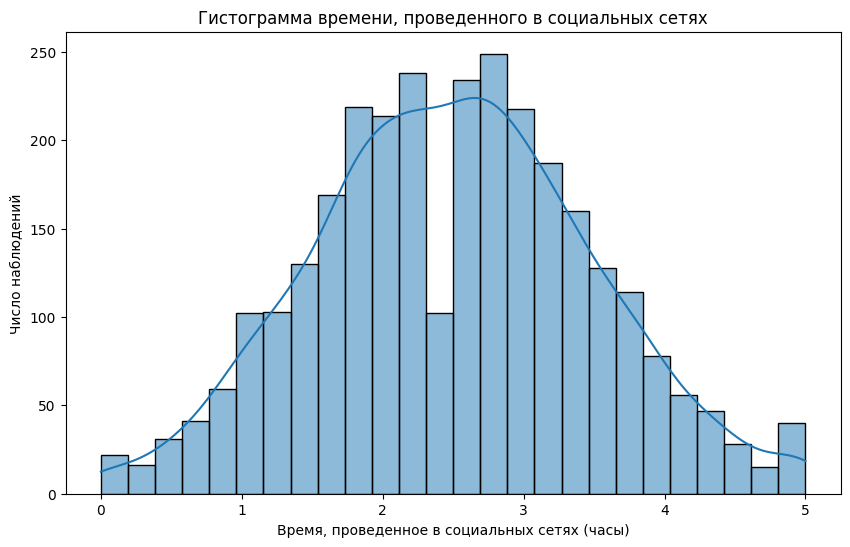

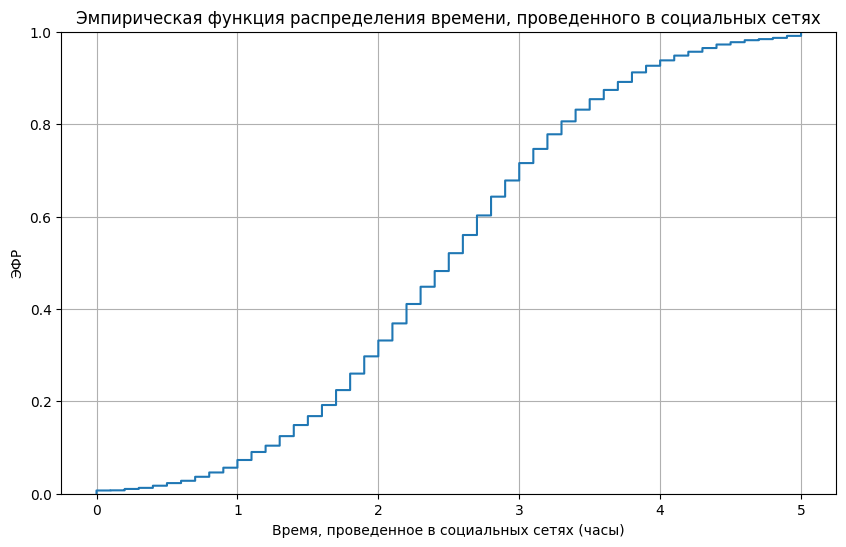

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(my_data, kde=True)
plt.title('Гистограмма времени, проведенного в социальных сетях')
plt.xlabel('Время, проведенное в социальных сетях (часы)')
plt.ylabel('Число наблюдений')
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(my_data)
plt.title('Эмпирическая функция распределения времени, проведенного в социальных сетях')
plt.xlabel('Время, проведенное в социальных сетях (часы)')
plt.ylabel('ЭФР')
plt.grid(True)
plt.show()

### Визуализация распределения

Эти графики представляют визуальное представление распределения 'Time_on_Social_Media':

*   **Гистограмма с KDE:** Гистограмма показывает частотное распределение данных, где по оси X отложено время, а по оси Y - количество наблюдений в каждом интервале. Линия оценки плотности ядра (KDE) дает сглаженное представление распределения.
*   **Эмпирическая функция распределения (ECDF):** График ECDF показывает долю точек данных, которые меньше или равны заданному значению. Он возрастает от 0 до 1 и дает представление о форме распределения и процентилях.

**Промежуточный вывод:**

Гистограмма выглядит примерно колоколообразной, что характерно для нормального распределения. Линия KDE также следует этой закономерности. График ECDF показывает гладкую S-образную кривую, что также соответствует непрерывному распределению, такому как нормальное распределение. Хотя визуальный осмотр предполагает почти нормальное распределение, для подтверждения необходимы дальнейшие статистические тесты.

In [14]:
data = df['Time_on_Social_Media'].dropna().values
n = len(data)

# Параметры нормального распределения
mean = np.mean(data)
std = np.std(data, ddof=1)

# Количество интервалов
k = int(1 + 3.322*np.log10(n))
bins = np.linspace(np.min(data), np.max(data), k+1)

# Наблюдаемые частоты
O, _ = np.histogram(data, bins=bins)

# Ожидаемые частоты
def normal_pdf(x, mean, std):
    return (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/std)**2)

E = []
for i in range(len(bins)-1):
    # интеграл плотности по интервалу
    prob = (normal_pdf(bins[i+1], mean, std) + normal_pdf(bins[i], mean, std))/2 * (bins[i+1]-bins[i])
    E.append(prob * n)
E = np.array(E)

# Статистика Хи-квадрат
chi2_stat = np.sum((O - E)**2 / E)
print("Chi-squared statistic:", chi2_stat)

Chi-squared statistic: 63.19660593177808


### Критерий согласия Пирсона (Хи-квадрат) для проверки нормальности

Этот код выполняет критерий согласия Хи-квадрат для оценки того, следует ли переменная 'Time_on_Social_Media' нормальному распределению. Тест сравнивает наблюдаемые частоты в различных интервалах данных с ожидаемыми частотами, если бы данные были нормально распределены с тем же средним значением и стандартным отклонением.

*   **Статистика Хи-квадрат:** Мера различия между наблюдаемыми и ожидаемыми частотами. Большая статистика указывает на большее отклонение от нормальности.

Чтобы формально интерпретировать эту статистику, ее следует сравнить с критическим значением из распределения Хи-квадрат с числом степеней свободы, равным количеству интервалов минус количество оцененных параметров (среднее и стандартное отклонение) минус один. Если рассчитанная статистика больше критического значения (или если p-значение ниже выбранного уровня значимости), то нулевая гипотеза о нормальном распределении данных отклоняется.

**Промежуточный вывод:**

Рассчитанная статистика Хи-квадрат составляет 63.1966. Без знания критического значения для сравнения (которое зависит от уровня значимости и числа степеней свободы) трудно сделать окончательный вывод о нормальности, основываясь только на этом значении. Однако это значение будет использоваться в сочетании с другими тестами и визуализациями.

In [15]:
x_bar = mean
m2 = np.mean((data - x_bar)**2)
m3 = np.mean((data - x_bar)**3)
m4 = np.mean((data - x_bar)**4)

skewness = m3 / (m2**1.5)
kurtosis = m4 / (m2**2) - 3

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.06693949989874562
Kurtosis: -0.21487391248537868


### Расчет асимметрии и эксцесса

Эта ячейка явно рассчитывает асимметрию и эксцесс данных 'Time_on_Social_Media' с использованием метода моментов. Эти значения предоставляют дополнительные количественные меры формы распределения, дополняя визуальный анализ и критерий согласия Хи-квадрат.

*   **Асимметрия:** Как упоминалось ранее, указывает на асимметрию. Значение, близкое к 0, предполагает симметрию.
*   **Эксцесс:** Измеряет "хвостатость" и остроту пика относительно нормального распределения (которое имеет эксцесс 0). Положительный эксцесс указывает на более тяжелые хвосты и более острый пик, в то время как отрицательный эксцесс указывает на более легкие хвосты и более плоский пик.

**Промежуточный вывод:**

Рассчитанная асимметрия (0.0669) очень близка к нулю, что указывает на высокую степень симметрии данных. Эксцесс (-0.2148) немного отрицателен, что предполагает, что распределение может иметь немного более легкие хвосты и быть менее остроконечным, чем идеальное нормальное распределение. Эти значения дополнительно подтверждают визуальную оценку того, что распределение является приблизительно нормальным.

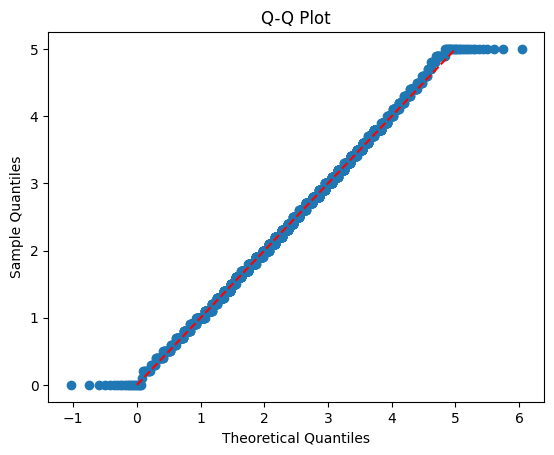

In [16]:
# сортируем данные
data_sorted = np.sort(data)

# квантили теоретического нормального распределения
prob = (np.arange(1, n+1) - 0.5) / n
from math import erf, sqrt

# инверт стандартного нормального CDF
def inv_norm_cdf(p):
    # Используем приближение через функцию ошибок
    return sqrt(2) * erfinv(2*p - 1)

# Поскольку numpy не имеет erfinv по умолчанию без scipy, сделаем через np
from numpy import sqrt, log
def erfinv(y):
    # приближение Вейрхейта (достаточно для графика)
    a = 0.147
    ln = np.log(1 - y**2)
    return np.sign(y) * sqrt(sqrt((2/(np.pi*a) + ln/2)**2 - ln/a) - (2/(np.pi*a) + ln/2))


q_theor = mean + std * np.array([inv_norm_cdf(p) for p in prob])

# Рисуем Q-Q plot
plt.scatter(q_theor, data_sorted)
plt.plot([data_sorted[0], data_sorted[-1]], [data_sorted[0], data_sorted[-1]], color='red', linestyle='--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot")
plt.show()

### Q-Q график для оценки нормальности

Квантиль-квантильный (Q-Q) график является графическим инструментом для оценки того, следует ли набор данных определенному распределению, в данном случае нормальному распределению. Он строит квантили наблюдаемых данных против теоретических квантилей стандартного нормального распределения.

*   **Интерпретация:** Если данные нормально распределены, точки на Q-Q графике будут примерно лежать вдоль красной пунктирной линии (которая представляет линию y=x). Отклонения от этой линии указывают на отклонения от нормальности. Например, если точки изгибаются вверх, это предполагает, что данные имеют более тяжелые хвосты, чем нормальное распределение.

**Промежуточный вывод о нормальности:**

Глядя на Q-Q график, большинство точек данных лежат близко к красной пунктирной линии. Есть некоторые отклонения на хвостах, что не редкость для реальных данных. Однако общий характер предполагает, что данные 'Time_on_Social_Media' достаточно близки к нормальному распределению. В сочетании с асимметрией и эксцессом, близкими к нулю, и примерно колоколообразной гистограммой, есть основания предполагать, что данные приблизительно нормально распределены, хотя статистика критерия согласия Хи-квадрат требует дальнейшей интерпретации с критическим значением.

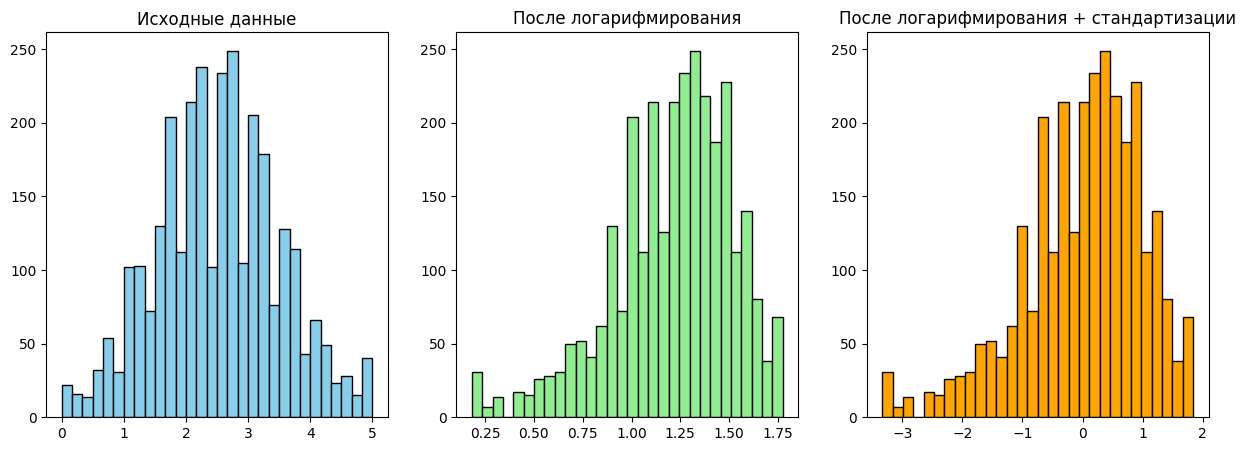

In [17]:
# --- 1. Усечение выбросов (например, по 1% и 99%)
low, high = np.percentile(data, [1, 99])
data_clipped = np.clip(data, low, high)

# --- 2. Логарифмирование (сдвигаем, если есть нули)
data_log = np.log1p(data_clipped)

# --- 3. Стандартизация (z-score)
mean = np.mean(data_log)
std = np.std(data_log, ddof=1)
data_normalized = (data_log - mean) / std

# --- 4. Проверим графики
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].hist(data, bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("Исходные данные")

axes[1].hist(data_log, bins=30, color="lightgreen", edgecolor="black")
axes[1].set_title("После логарифмирования")

axes[2].hist(data_normalized, bins=30, color="orange", edgecolor="black")
axes[2].set_title("После логарифмирования + стандартизации")

plt.show()

### Влияние обработки данных на распределение

В этом разделе демонстрируется влияние распространенных методов обработки данных на распределение 'Time_on_Social_Media'. Применяются три преобразования и визуализируется распределение на каждом шаге:

1.  **Усечение выбросов:** Значения ниже 1-го процентиля и выше 99-го процентиля ограничиваются для уменьшения влияния экстремальных значений.
2.  **Логарифмическое преобразование (log1p):** Функция `log1p` (log(1+x)) используется для обработки потенциальных нулевых значений и уменьшения асимметрии распределения, часто делая его более симметричным.
3.  **Стандартизация (Z-оценка):** Данные преобразуются таким образом, чтобы иметь среднее значение 0 и стандартное отклонение 1. Это полезно для сравнения данных из разных масштабов и является общим требованием для многих статистических моделей.

Гистограммы показывают, как каждое преобразование изменяет форму и разброс распределения данных.

**Промежуточный вывод об обработке данных:**

Гистограммы показывают, что исходные данные уже достаточно симметричны. Логарифмическое преобразование (log1p) в данном случае делает распределение слегка левосторонне скошенным, что предполагает, что оно может быть не самым подходящим преобразованием для этого конкретного набора данных, который уже близок к нормальному. Стандартизация масштабирует данные так, чтобы они имели среднее значение 0 и стандартное отклонение 1, что является полезным преобразованием для многих алгоритмов машинного обучения, но не меняет фундаментальную форму распределения. В данном случае распределение исходных данных не сильно улучшается этими конкретными преобразованиями с точки зрения достижения более "нормальной" формы, поскольку оно уже было довольно близко к нормальному.

Статистика по группам:
  School_Grade      mean       var
0         10th  2.524025  0.922734
1         11th  2.487891  0.945878
2         12th  2.463894  1.013978
3          7th  2.540040  0.919583
4          8th  2.469917  1.030382
5          9th  2.510456  1.025967


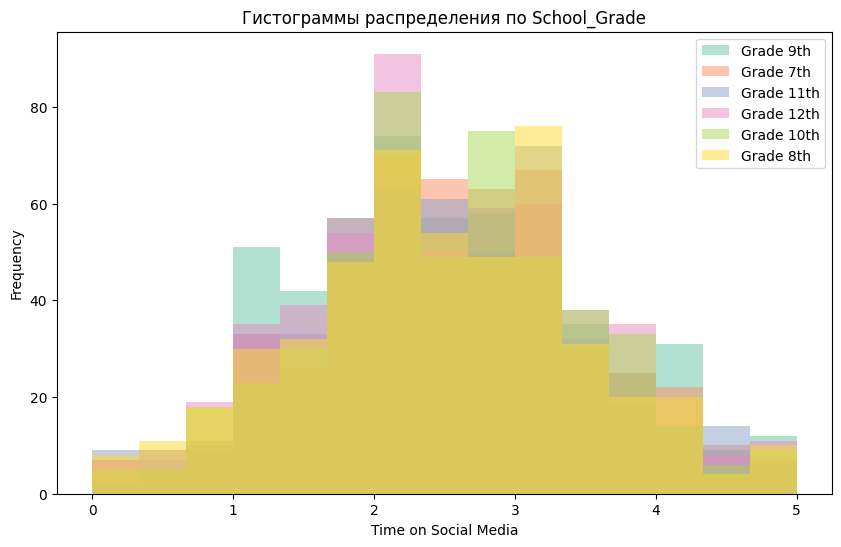

In [18]:
# Берем нужные столбцы
data = df[['School_Grade', 'Time_on_Social_Media']].dropna()

# Группировка
groups = data.groupby('School_Grade')['Time_on_Social_Media']

# --- 1. Рассчет среднего и дисперсии для каждой группы
stats = groups.agg(['mean', 'var']).reset_index()
print("Статистика по группам:")
print(stats)

# --- 2. Гистограммы на одном графике
plt.figure(figsize=(10,6))

grades = data['School_Grade'].unique()
colors = plt.cm.Set2.colors  # палитра для разных групп

for i, grade in enumerate(grades):
    subset = data[data['School_Grade'] == grade]['Time_on_Social_Media']
    plt.hist(subset, bins=15, alpha=0.5, label=f'Grade {grade}', color=colors[i % len(colors)])

plt.xlabel("Time on Social Media")
plt.ylabel("Frequency")
plt.title("Гистограммы распределения по School_Grade")
plt.legend()
plt.show()

### Различия в распределениях по школьным классам

В этом разделе анализируется и визуализируется распределение 'Time_on_Social_Media' отдельно для каждого школьного класса. Это помогает понять, есть ли заметные различия в моделях использования социальных сетей среди учащихся разных классов.

*   **Сгруппированные статистики:** Таблица показывает среднее значение и дисперсию 'Time_on_Social_Media' для каждого школьного класса, предоставляя числовое сравнение центральной тенденции и разброса.
*   **Наложенные гистограммы:** График гистограммы отображает распределения для каждого класса на одних и тех же осях, что позволяет напрямую визуально сравнивать их формы, центры и разброс. Для различения классов используются разные цвета.

**Промежуточный вывод о различиях в группах:**

Глядя на сгруппированные статистики, среднее значение и дисперсия 'Time_on_Social_Media' довольно схожи в разных школьных классах. Наложенные гистограммы также показывают, что распределения для каждого класса в значительной степени перекрываются и имеют схожие формы и разброс. Это говорит о том, что, основываясь на этом наборе данных, существенных различий в распределении времени, проведенного в социальных сетях, среди учащихся разных школьных классов нет.